載入套件

In [30]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional_recurrent import ConvLSTM2D
import keras
from keras.layers import Dense,LSTM,Dropout
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import tensorflow
from keras.models import load_model 

載入預處理好的資料

In [31]:
#%%
data=np.load('/content/drive/MyDrive/lstm/bias1.npz')
x=data['X']
x=np.reshape(x,(x.shape[0],x.shape[1],1))

y=data['Y']

x,y=shuffle(x,y, random_state=18)

In [60]:
print(x.shape)
print(y.shape)

(3360, 72, 1)
(3360,)


切割訓練、測試資料

In [32]:
#%%
from sklearn.model_selection import train_test_split
train_X, test_X,train_y, test_y = train_test_split(x,y, random_state=2, train_size=0.9)

建立LSTM模型

In [68]:
#%%
model = Sequential()
model.add(LSTM(units = 72, return_sequences = False, input_shape = (72, 1),activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')
model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=2) 
history = model.fit(train_X, train_y, epochs=100,batch_size=1024,validation_split=0.3)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 72)                21312     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 73        
Total params: 21,385
Trainable params: 21,385
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 1s 181ms/step - loss: 2.6917 - val_loss: 2.5265
Epoch 2/100
3/3 [==============================] - 0s 32ms/step - loss: 2.4284 - val_loss: 2.2700
Epoch 3/100
3/3 [==============================] - 0s 30ms/step - loss: 2.1722 - val_loss: 2.0279
Epoch 4/100
3/3 [==============================] - 0s 31ms/step - loss: 1.9546 - val_loss: 1.8037
Epoch 5/100
3/3 [==============================] - 0s 29ms/step - loss: 1.7102 - val_loss: 1.6091
Epoch 6/100
3/3 [====

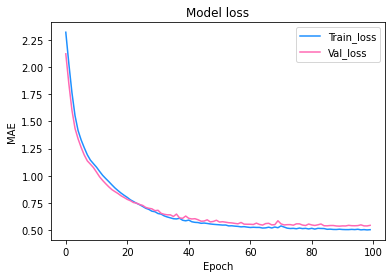

In [43]:
#%%
plt.plot(history.history['loss'],'dodgerblue')
plt.plot(history.history['val_loss'],'hotpink')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train_loss', 'Val_loss'], loc='upper right')
plt.show()

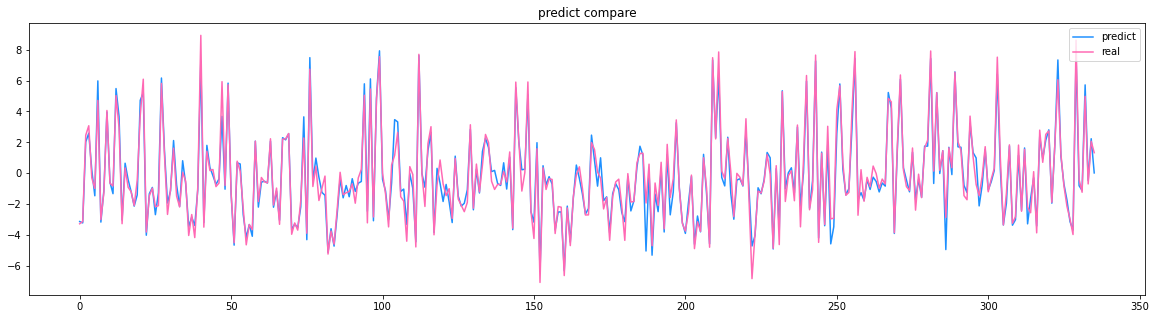

In [69]:
#%%
plt.figure(figsize=(20,5))
pred_y=model.predict(test_X,batch_size=4096)
plt.plot(pred_y,'dodgerblue')
plt.plot(test_y,'hotpink')
plt.title('predict compare')
plt.legend(['predict', 'real'], loc='upper right')
plt.show()